# Time series analysis of top US companies

In [1]:
import pandas as pd
import fix_yahoo_finance as fyf
from matplotlib import pyplot as plt
from pandas_datareader import data as pdr
fyf.pdr_override()
%matplotlib inline

In [2]:
CMCSA = pdr.get_data_yahoo('CMCSA', start='2017-01-01')
CMCSA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,34.834999,34.945000,34.115002,34.525002,33.212471,23670400
2017-01-04,34.755001,35.130001,34.590000,34.935001,33.606884,22010800
2017-01-05,34.794998,35.130001,34.700001,35.075001,33.741566,16986000
2017-01-06,35.105000,35.270000,34.910000,35.134998,33.799274,13528000
2017-01-09,35.070000,35.480000,35.025002,35.415001,34.068638,18135400


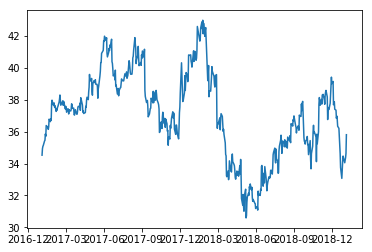

In [3]:
plt.plot(CMCSA['Close'])
plt.show()

In [4]:
CMCSA['dailyReturn'] = CMCSA['Close'].pct_change()
CMCSA['cumReturn'] = CMCSA['Close'].diff().cumsum() / CMCSA['Close'].iloc[0]
CMCSA.head()

,Open,High,Low,Close,Adj Close,Volume,dailyReturn,cumReturn
Date,,,,,,,,
2017-01-03,34.834999,34.945000,34.115002,34.525002,33.212471,23670400,NaN,NaN
2017-01-04,34.755001,35.130001,34.590000,34.935001,33.606884,22010800,0.011875,0.011875
2017-01-05,34.794998,35.130001,34.700001,35.075001,33.741566,16986000,0.004007,0.015930
2017-01-06,35.105000,35.270000,34.910000,35.134998,33.799274,13528000,0.001711,0.017668
2017-01-09,35.070000,35.480000,35.025002,35.415001,34.068638,18135400,0.007969,0.025778


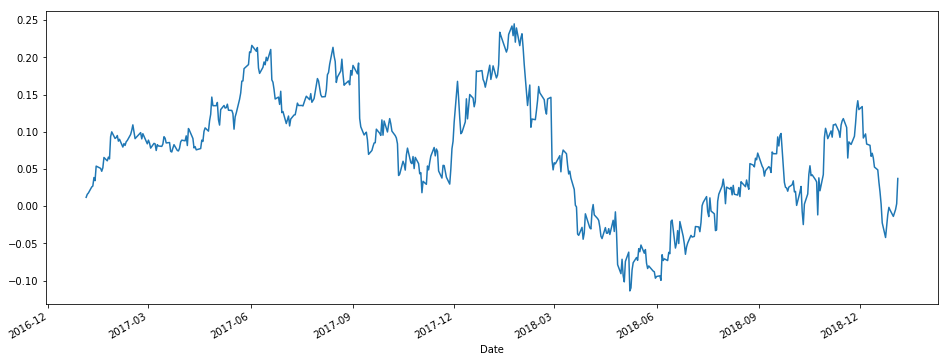

In [5]:
CMCSA['cumReturn'].plot(figsize=(16,6))

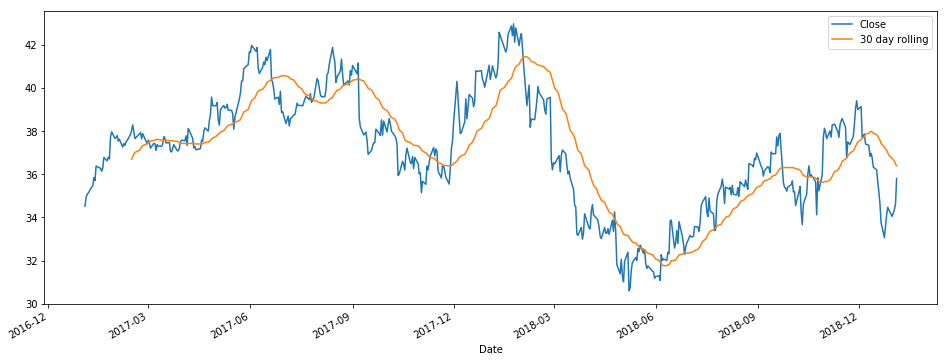

In [6]:
# create new column for 30 days then plot
CMCSA['30 day rolling'] = CMCSA['Close'].rolling(window=30).mean()
CMCSA[['Close', '30 day rolling']].plot(figsize=(16,6))

In [7]:
# imports daily closing price and volume
NFLX = pdr.get_data_yahoo('NFLX', start='2014-01-01')[['Close','Volume']]
CMCSA = pdr.get_data_yahoo('CMCSA', start='2014-01-01')[['Close','Volume']]
VZ = pdr.get_data_yahoo('VZ', start='2014-01-01')[['Close','Volume']]
GE = pdr.get_data_yahoo('GE', start='2014-01-01')[['Close','Volume']]

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [8]:
# creates daily price change column
NFLX['dailyChange'] = NFLX['Close'].pct_change()
CMCSA['dailyChange'] = CMCSA['Close'].pct_change()
VZ['dailyChange'] = VZ['Close'].pct_change()
GE['dailyChange'] = GE['Close'].pct_change()

In [9]:
# creates cumulative price change percentage since 2014
NFLX['cumulativeReturns'] = (1+ NFLX['dailyChange']).cumprod()
CMCSA['cumulativeReturns'] = (1+ CMCSA['dailyChange']).cumprod()
VZ['cumulativeReturns'] = (1+ VZ['dailyChange']).cumprod()
GE['cumulativeReturns'] = (1+ GE['dailyChange']).cumprod()

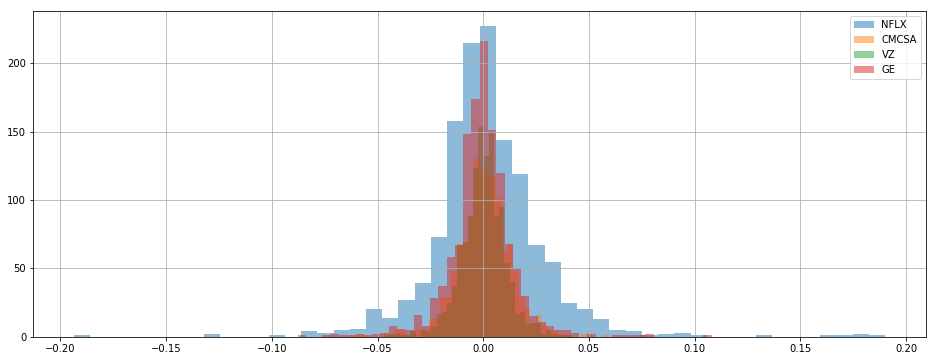

In [10]:
# histogram of daily returns bucketed into bins of 50
NFLX['dailyChange'].hist(bins=50,label='NFLX', figsize=(16,6),alpha=0.5)
CMCSA['dailyChange'].hist(bins=50,label='CMCSA',alpha=0.5)
VZ['dailyChange'].hist(bins=50,label='VZ',alpha=0.5)
GE['dailyChange'].hist(bins=50,label='GE',alpha=0.5)
plt.legend()

In [11]:
# combines daily return data of all companies into a single dataframe
box_df = pd.concat([NFLX['dailyChange'], CMCSA['dailyChange'], VZ['dailyChange'], GE['dailyChange']], axis=1)
box_df.columns = ['Netflix returns', 'Comcast returns', 'Verizon returns', 'GE returns']

In [12]:
box_df.head()

,Netflix returns,Comcast returns,Verizon returns,GE returns
Date,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,0.000772,-0.007386,-0.011837,-0.000727
2014-01-06,-0.009722,-0.000979,0.005576,-0.008006
2014-01-07,-0.055817,0.035476,0.012528,0.001101
2014-01-08,0.004389,-0.001514,-0.016227,-0.002932


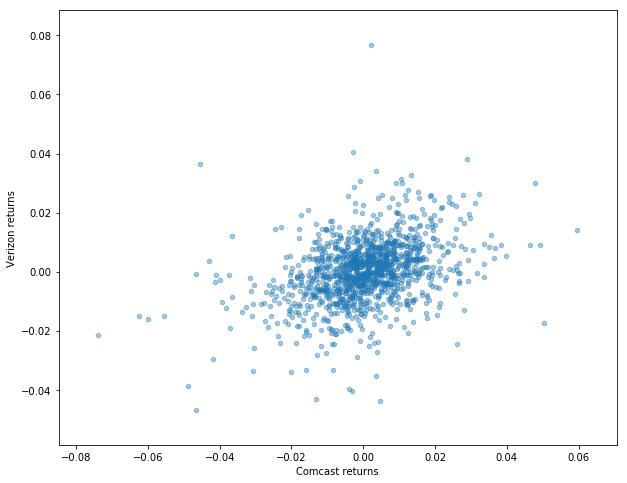

In [13]:
# scatter plot of Comcast and Verizion returns
box_df.plot(kind='scatter', x='Comcast returns', y='Verizon returns', alpha=0.4,figsize=(10,8))

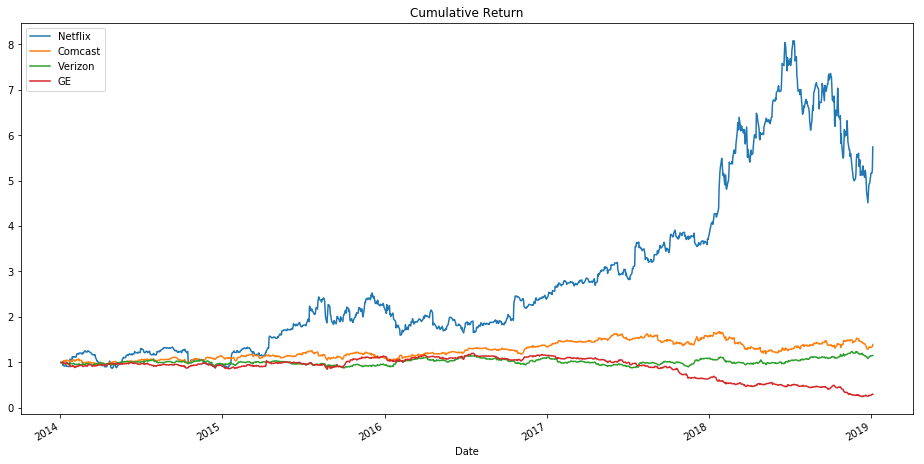

In [14]:
# time series chart of cumulative stock returns over the last four years
NFLX['cumulativeReturns'].plot(label='Netflix', figsize=(16,8), title='Cumulative Return')
CMCSA['cumulativeReturns'].plot(label='Comcast')
VZ['cumulativeReturns'].plot(label='Verizon')
GE['cumulativeReturns'].plot(label='GE')
plt.legend()